# Data Analysis and Exploration

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../data/csv/all.csv')

In [3]:
df.head()

,title,num_comments,score,over_18,locked,stickied,subreddit,created_utc,is_self,selftext
0,Dave Bautista has achieved full Drax.,330,22715,False,False,False,funny,1.527526e+09,False,
1,Not even safe in Super Mario 64...,461,36365,False,False,False,gaming,1.527525e+09,False,
2,rapid-fire cigar box juggling (sort of looks l...,639,56601,False,False,False,gifs,1.527522e+09,False,
3,Very true,2617,43332,False,False,False,pics,1.527526e+09,False,
4,Couple with Down's syndrome celebrate 22 years...,620,27582,False,True,False,aww,1.527525e+09,False,


## Distinguishing High Performing Posts

One goal of this project is to investigate which posts have a score higher than the median score among those posts on `all`. With our collected data of posts from `all`, we'll begin to explore this property. The actual value of the median for this data set should not be taken too seriously as some kind of extimation of the median score in general on reddit. 

In [4]:
med_all = df['score'].median()
df['higher_than_median'] = (df['score'] > med_all)

First we'll explore the relationship between `num_comments` and `higher_than_median`. The max is close to $1000$ times the $75$th percentile, so the scale is very strange. Let's look at a plot of the data up to the 95th percentile. 

In [5]:
df['num_comments'].describe()

count     9523.000000
mean        59.467290
std        438.420926
min          0.000000
25%          5.000000
50%         13.000000
75%         38.000000
max      36466.000000
Name: num_comments, dtype: float64

In [6]:
np.percentile(a=df['num_comments'], q= 95)

203.89999999999964

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


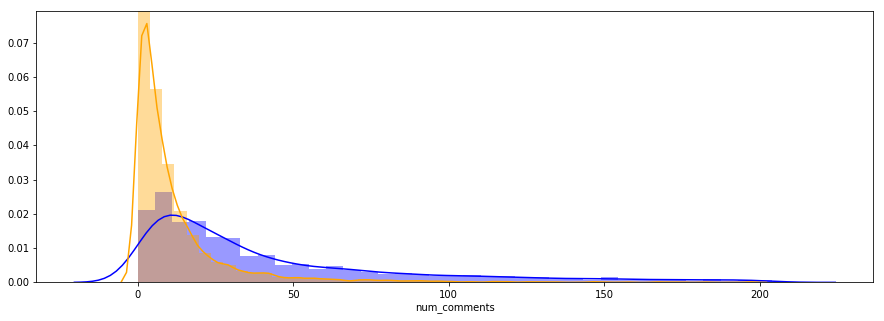

In [7]:
comments_mask = df['num_comments'] < 205
median_beat_mask = df['higher_than_median'] == True

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))

sns.distplot(a=df[comments_mask & median_beat_mask ]['num_comments'], color='blue', ax=ax)
sns.distplot(a=df[comments_mask & ~median_beat_mask]['num_comments'], color='orange', ax=ax)

The blue plot above reresents the posts which are successfully beating the median score, and the organge plot the posts which fail to beat the median score. Perhaps unsurprisingly, the more comemnts a thread has the more likely it is to have a score greater than the median. Also we can see form the plots above that `num_comments` has a fairly skewed distribution. The plot below makes it clear that this can be, at least partly, remedied with a log transform, so we'll do that. We'll try out a logistic regression model later, but we'll use the transformed variable since it has less skew.

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'log(1 + num_comments)')

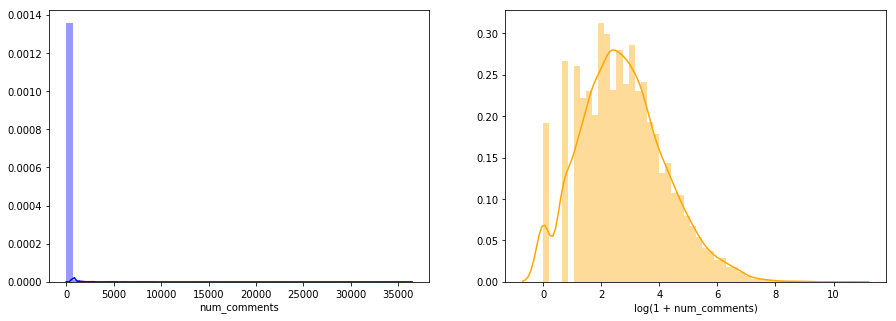

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.distplot(a=df.num_comments, color='blue', ax=ax[0])
sns.distplot(a=np.log1p(df['num_comments']), color='orange', ax=ax[1])
ax[1].set_xlabel('log(1 + num_comments)')

In [9]:
df['num_comments_log1p'] = np.log1p(df['num_comments'])
df.drop('num_comments', 1, inplace=True)

# Time Created

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


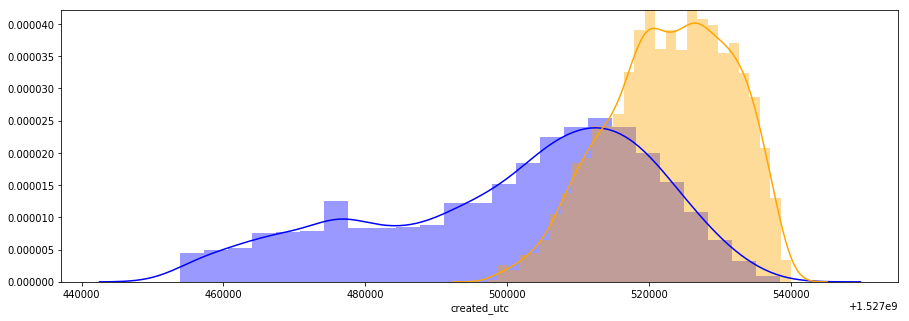

In [10]:
median_beat_mask = df['higher_than_median'] == True
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
sns.distplot(a=df[median_beat_mask ]['created_utc'], color='blue')
sns.distplot(a=df[~median_beat_mask]['created_utc'], color='orange')

Again, this is perhaps unsuprising but posts with scores that break the median tend to be older than those which do not. In fact this makes perfect sense as newer posts have not yet had the time to accrue enough upvotes to beat the median score.

# Categorical Variables

In [11]:
df['stickied'].value_counts()

False    9487
True       36
Name: stickied, dtype: int64

In [12]:
df['is_self'].value_counts()

False    8667
True      856
Name: is_self, dtype: int64

In [13]:
df['over_18'].value_counts()

False    8457
True     1066
Name: over_18, dtype: int64

In [14]:
df['locked'].value_counts()

False    9512
True       11
Name: locked, dtype: int64

I think we can safely discard the `stickied` feature since we have so few of them. It could also be argued that stickied posts represent their own category of post and should be ignored anyway wholesale. 

In [15]:
df.drop(['stickied', 'locked', 'selftext'], 1, inplace=True)

# Title of Thread

In the modeling pipeline we'll take care of the natural language processing, but we can at least take a look at the relationshipb between, for example, title length and perfomance.

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


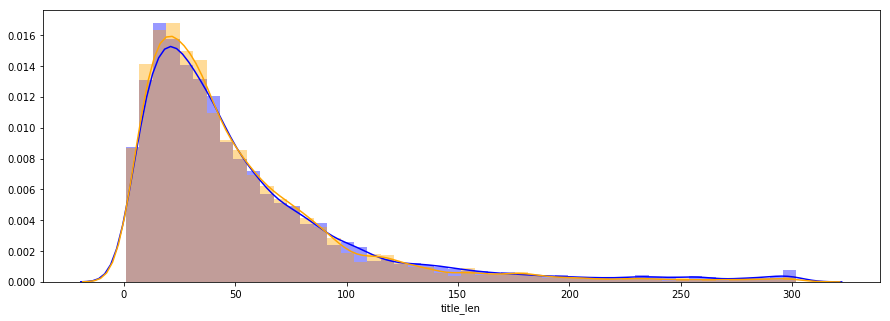

In [16]:
df['title_len'] = df['title'].str.len()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))

sns.distplot(a=df[median_beat_mask ]['title_len'], color='blue', ax=ax)
sns.distplot(a=df[~median_beat_mask]['title_len'], color='orange', ax=ax)

Well, there doesn't actually seem to be much of any relationship here! At least at a glance there seems to be distinguishing between the two classes using the length of a title. Still, we won't drop this feature for now. It's very likely that the models we fit will report back the importance of this features is very low.

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'title_len')

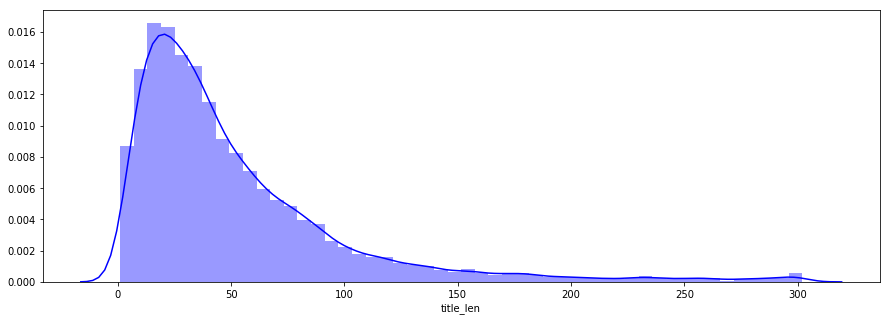

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
sns.distplot(a=df['title_len'], color='blue', ax=ax)
ax.set_xlabel('title_len')


The length of the titles is fairly skewed, but again the log transform fixes most of that. We'll save the transformed data so that we can use it for our logistic regression models later.

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'log(1+title_len)')

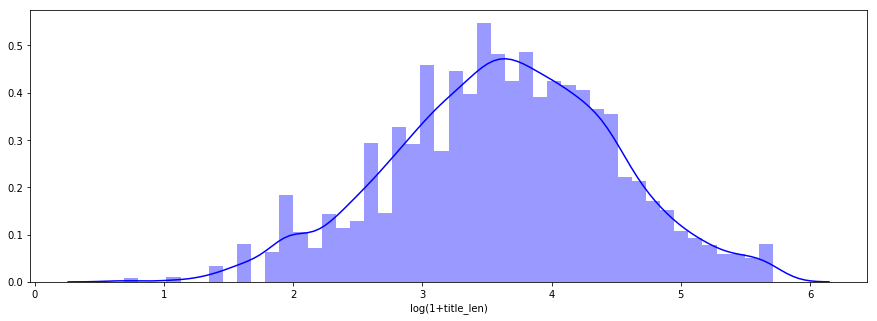

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
sns.distplot(a=np.log1p(df['title_len']), color='blue', ax=ax)
ax.set_xlabel('log(1+title_len)')

In [19]:
df['title_len_log1p'] = np.log1p(df['title_len'])
df.drop('title_len', 1, inplace=True)

# Summary

So far we've found support for the following three broad ideas  
1. posts that break the median tend to have more comments than those which do not
2. posts that break the median tend to be older than those which do not 
3. length of title is an unimportant feature

We've also made the decision to log transform the `num_comments` and `title_len` features. I'll reiterate now that even though the plots made no meaningful relationship between `title_len` clear, I am going to try the feature out and allow it to be eliminiated later when doing feature selection rather than now. 

In [20]:
df.to_csv('../data/csv/all_processed.csv', index=False)